In [19]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
from mnist import MNIST

mndata = MNIST('/home/carlosg/Carlos/python/mnist')

train_images, train_labels = mndata.load_training()
# or
test_images, test_labels = mndata.load_testing()

In [3]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

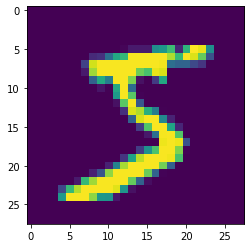

In [4]:
from matplotlib.pyplot import imshow 
imshow(np.array(train_images[0]).reshape(28,28))
# train_images[0]

In [45]:
# Model
class CACAnet(nn.Module):
    def __init__(self):
        super(CACAnet,self).__init__()
        self.lin1 = nn.Linear(784,128)
        self.act = nn.ReLU()
        self.lin2 = nn.Linear(128,10)
    
    def forward(self,x):
        x = self.lin1(x)
        x = self.act(x)
        x = self.lin2(x)
        return x


In [52]:
model = CACAnet()
# Train
loss_funct = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
BS = 128
model.train()
losses = []
for i in range(100):
    samp = np.random.randint(0,train_images.shape[0], size=BS)
    X = torch.Tensor(train_images[samp]).float()
    Y = torch.Tensor(train_labels[samp]).long()
    optimizer.zero_grad()
    out = model(X)
    loss = loss_funct(out, Y) #The loss funct. does not only input the predicted output but all of the output
    losses.append(loss.item())
    predictions = torch.stack([t.max(0).indices for t in out])
    accuracy = (predictions==Y).sum().item()/BS
    loss.backward()
    optimizer.step()
print(f'Loss: {loss} | Test accuracy:{accuracy}')    


Loss: 0.6520291566848755 | Test accuracy:0.8828125


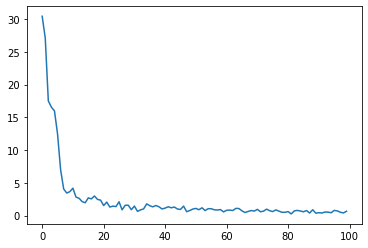

In [53]:
plt.plot(losses)

In [54]:
# Eval
model.eval()
X = torch.Tensor(test_images).float()
Y = torch.Tensor(test_labels).long()
out = model(X)
predictions = torch.stack([t.max(0).indices for t in out])
accuracy = (predictions==Y).sum().item()/Y.shape[0]
print(f'Eval. accuracy:{accuracy}')  

Eval. accuracy:0.8875
